<a href="https://colab.research.google.com/github/Muhammad-Usama-07/DeepLearning-Work/blob/main/Classifying_newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying newswires

# Loading the Reuters dataset

In [16]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


# Checking lengh OF DATA

In [17]:
len(train_data)

8982

In [18]:
 len(test_data)

2246

# Decoding newswires back to text

In [19]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

In [20]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

# Preparing the data

In [21]:
# Encoding the data
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data) # Vectorized training data
x_test = vectorize_sequences(test_data)   # Vectorized test data

In [22]:
# one-hot-encoding
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

#  Definng Model 

In [23]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# Compiling the model


In [24]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

# Making Validation Data

In [25]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Training the model

In [26]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 16s 86ms/step - loss: 3.0402 - accuracy: 0.4163 - val_loss: 1.6808 - val_accuracy: 0.6410
Epoch 2/20
16/16 [==============================] - 1s 60ms/step - loss: 1.4536 - accuracy: 0.6971 - val_loss: 1.2734 - val_accuracy: 0.7280
Epoch 3/20
16/16 [==============================] - 1s 63ms/step - loss: 1.0672 - accuracy: 0.7716 - val_loss: 1.1387 - val_accuracy: 0.7450
Epoch 4/20
16/16 [==============================] - 1s 64ms/step - loss: 0.8621 - accuracy: 0.8078 - val_loss: 1.0354 - val_accuracy: 0.7660
Epoch 5/20
16/16 [==============================] - 1s 57ms/step - loss: 0.6739 - accuracy: 0.8564 - val_loss: 0.9845 - val_accuracy: 0.7880
Epoch 6/20
16/16 [==============================] - 1s 51ms/step - loss: 0.5454 - accuracy: 0.8873 - val_loss: 0.9376 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 1s 51ms/step - loss: 0.4300 - accuracy: 0.9144 - val_loss: 0.8913 - val_accuracy: 0.8150
Epoch 8/20
1

#  Plotting the training and validation loss

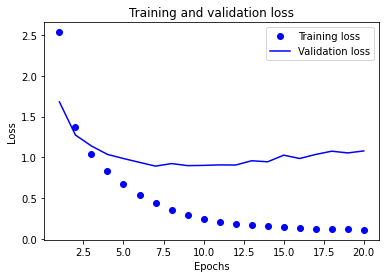

In [27]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()